In [2]:
cd drive/My Drive/Colab_Notebooks/simplified 

/content/drive/My Drive/Colab_Notebooks/simplified


In [3]:
pip install scipy==1.1.0     #update required packages

     |████████████████████████████████| 31.2MB 105kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
!python calib.py    # run camera calib to get camera intrinsics

i: 1
i: 2
i: 3
i: 4
ret: 0.29188309392284795
mtx:
 [[1.19496125e+03 0.00000000e+00 6.43584750e+02]
 [0.00000000e+00 1.19085244e+03 3.38202014e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist:
 [[ 1.84080522e-01 -2.41765222e+00  8.38038838e-04  2.11419127e-03
   1.18544354e+01]]


In [4]:
%matplotlib inline
!python main.py


video_1 frame number is:  631
video_2 frame number is:  875
Video1 sampled frame number is 63
Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.46074235468057
Video2 sampled frame number is 87
Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.43485086342229
frame number is 2
7
train_size: 118
valid_size: 14
============================== Trainning start
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
idx:    0 reconstr: 0.38941  smooth: 0.20957  ssim: 0.53524  total: 0.41967
idx:    0 reconstr: 0.48583  smooth: 0.01742  ssim: 0.40118  total: 0.47383
idx:    0 reconstr: 0.39297  smooth: 0.01453  ssim: 0.54505  total: 0.41636
idx:    0 reconstr: 0.40454  smooth:

torch.Size([1, 1, 128, 416])


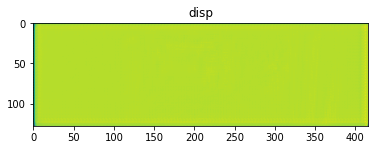

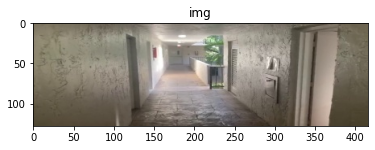

(<matplotlib.image.AxesImage at 0x7f92da099b70>, None)

In [5]:
%matplotlib inline

import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import cv2
import matplotlib.pyplot as plt
from imageio import imread
import custom_transforms
from DispNetS import DispNetS


path = "./dataset/video1/0020.jpg"  #  128 x 416 

def load_as_float(path):
    return imread(path).astype(np.float32)


img = load_as_float(path)

img_copy = cv2.imread(path)


to_tensor = custom_transforms.Compose([ custom_transforms.ArrayToTensor() ])
image_stack = to_tensor( [img] )

img = image_stack[0]
#print(img.size())

img = img.expand(1,3,128,416)
#print(img.size())

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")


disp_net = DispNetS().to(device)
disp_net.init_weights()
disp_net.load_state_dict(torch.load("./disp_net_best.pth"))
disp_net.eval()


multiscale_disps_i, _ = disp_net(img)

disp = multiscale_disps_i[0]
print(disp.size())

disp = disp.detach().cpu().numpy()
disp = disp.squeeze()

disp = cv2.normalize(disp, None, 0, 255, cv2.NORM_MINMAX)
#disp = disp.astype(np.uint8)


plt.figure()  # cv2.cvtColor(cc,  cv2.COLOR_BGR2RGB)
plt.title('disp')
plt.imshow( disp ),plt.show()



plt.figure()  # cv2.cvtColor(cc,  cv2.COLOR_BGR2RGB)
plt.title('img')
plt.imshow( cv2.cvtColor(img_copy,  cv2.COLOR_BGR2RGB) ),plt.show()

